<a href="https://colab.research.google.com/github/YashRane123/ML-LAB/blob/main/Linear_Regression_salaryDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Salary_Data.csv")

In [ ]:
data.head(50)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


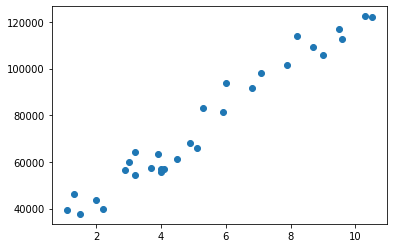

In [ ]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.show()

In [ ]:
corr = data.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


SPLITTING DATA

In [ ]:
data.shape

(30, 2)

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
train_x, train_y = np.array(train_data['YearsExperience']).reshape(-1,1),np.array(train_data['Salary']).reshape(-1,1)
test_x, test_y = np.array(test_data['YearsExperience']).reshape(-1,1),np.array(test_data['Salary']).reshape(-1,1)

CREATING MODEL

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
train_x

array([[-1.36666691],
       [-0.96398827],
       [ 0.09761906],
       [-0.70773822],
       [-0.26845243],
       [-0.30505958],
       [ 1.12261925],
       [-1.29345261],
       [-1.22023831],
       [ 1.52529789],
       [-1.03720256],
       [ 0.82976205],
       [ 1.70833364],
       [ 0.39047626],
       [ 2.07440513],
       [ 0.7199406 ],
       [-0.59791677],
       [-0.34166673],
       [-0.12202383],
       [ 0.42708341],
       [-0.67113107]])

In [ ]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [ ]:
model.score(train_x,train_y)

0.9574526669392872

In [ ]:
score = cross_val_score(model, train_x,train_y,scoring='neg_mean_absolute_error',cv=3)
score = (-score)
score.mean()

4554.418970460488

In [ ]:
test_x = scaler.transform(test_x)
test_predict = model.predict(test_x)
score = mean_absolute_error(test_y,test_predict)
score

5161.32871040018

In [ ]:
model.score(test_x,test_y)

0.9414466227178214

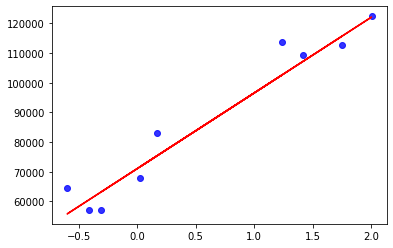

In [ ]:
plt.scatter(test_x,test_y,color = 'b',alpha = 0.8)
plt.plot(test_x,test_predict,color='r')
plt.show()